# Earthqauke Alert



by Roger Koranteng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
%matplotlib inline
import xgboost as xgb

In [2]:
data = pd.read_csv('EarthQuake.csv')

In [3]:
data_predict = pd.read_csv('Earthquake_predict.csv')

In [4]:
data.head()

,date,depth,mag,place,latitude,longitude,depth_avg_20,depth_avg_10,depth_avg_5,mag_avg_20,mag_avg_10,mag_avg_5,mag_outcome
0,2020-07-13,7.00,0.40,Aleutian Islands,51.900695,6.601789,50.106818,58.450667,55.807143,1.868636,2.100000,2.471429,0
1,2020-07-14,40.30,2.00,Aleutian Islands,51.900695,6.601789,51.343182,58.370667,46.020000,1.855000,2.066667,2.385714,0
2,2020-07-14,79.40,1.60,Aleutian Islands,51.900695,6.601789,52.397727,63.523333,55.977143,1.845909,2.226667,2.342857,0
3,2020-07-14,88.10,1.80,Aleutian Islands,51.900695,6.601789,55.861364,67.416667,51.520000,1.823182,2.233333,2.185714,0
4,2020-07-14,7.08,0.15,Aleutian Islands,51.900695,6.601789,55.942727,60.222000,35.568571,1.805909,2.083333,1.750000,0


In [5]:
data_predict.head()

,date,depth,mag,place,latitude,longitude,depth_avg_22,depth_avg_15,depth_avg_7,mag_avg_22,mag_avg_15,mag_avg_7,mag_outcome
0,2020-08-03,140.81,4.4,Papua New Guinea,-5.297074,148.894953,73.251364,70.354000,83.355714,4.718182,4.820000,4.942857,NaN
1,2020-08-04,172.48,5.4,Papua New Guinea,-5.297074,148.894953,76.803636,75.935333,106.567143,4.763636,4.893333,4.857143,NaN
2,2020-08-05,94.65,5.0,Papua New Guinea,-5.297074,148.894953,79.948636,76.711333,105.600000,4.790909,4.933333,4.971429,NaN
3,2020-08-06,196.24,4.8,Papua New Guinea,-5.297074,148.894953,87.892273,89.127333,113.395714,4.813636,4.926667,5.071429,NaN
4,2020-08-06,85.48,4.7,Papua New Guinea,-5.297074,148.894953,88.371818,81.767333,124.178571,4.809091,4.953333,4.914286,NaN


Determine the correletion between the variables by using the coor() function

In [6]:
corr_matrix = data.corr()

In [7]:
corr_matrix['mag_outcome'].sort_values(ascending=False)

mag_outcome     1.000000
mag_avg_20      0.631452
mag_avg_10      0.616365
mag_avg_5       0.583941
longitude       0.523044
mag             0.414083
depth_avg_20    0.189901
depth_avg_10    0.183527
depth_avg_5     0.165947
depth           0.099755
latitude       -0.347483
Name: mag_outcome, dtype: float64

Removing some attributes to make the data more clean and precise for prediction

In [8]:
attributes = [f for f in list(data) if f not in ['date', 'lon_box_mean',
 'lat_box_mean', 'mag_outcome', 'mag', 'place',
 'combo_box_mean',  'latitude',
 'longitude']]

# splitting training and testing dataset 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(data[attributes],
                     data['mag_outcome'], test_size=0.2, random_state=42)
  

In [9]:
X_train

,depth,depth_avg_20,depth_avg_10,depth_avg_5,mag_avg_20,mag_avg_10,mag_avg_5
5040,1.24,5.667727,5.356000,2.601429,1.015000,1.053333,1.262857
12436,7.42,5.999545,5.690000,6.151429,1.174091,1.178000,0.987143
9754,-1.66,4.776364,3.917333,1.904286,1.321818,1.357333,1.332857
5826,3.92,5.637273,5.478667,5.301429,1.020455,0.998667,1.102857
10766,4.90,6.472727,5.180000,3.542857,1.213636,1.240000,1.242857
...,...,...,...,...,...,...,...
11964,13.30,9.027273,8.440000,9.228571,1.163636,1.213333,1.328571
5191,-0.72,5.966818,5.752000,5.244286,0.970000,0.983333,1.204286
5390,3.10,6.494545,6.809333,6.000000,0.932273,0.922000,0.817143
860,19.90,32.025455,26.430000,9.288571,1.151818,1.017333,0.978571


In [10]:
attributes

['depth',
 'depth_avg_20',
 'depth_avg_10',
 'depth_avg_5',
 'mag_avg_20',
 'mag_avg_10',
 'mag_avg_5']

# Using Random Forest Classifier

In [11]:
random_forest = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 800],
    'max_features': ['auto', 'sqrt', 'log2']
}

random_forest.fit(X_train,y_train)

CV_random_forest = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5)
CV_random_forest.fit(X_train, y_train)
    


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=True),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 800]})

In [12]:
pred=CV_random_forest.predict(X_test)

In [13]:
pred

array([1, 0, 0, ..., 0, 0, 0])

# Evaluation using Area Under Curve

0.9008113367758607
AUC: 0.9008


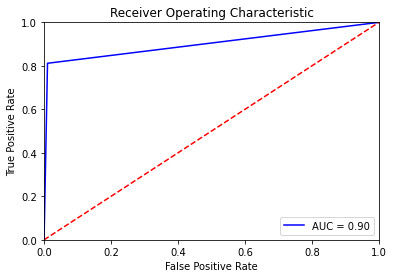

Confusion Matrix: 
 [[2412   25]
 [  19   82]]

Recall 'TP/TP+FN' =  0.8118811881188119


In [14]:
print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print("Confusion Matrix: \n",confusion_matrix(y_test,pred))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,pred))

# Using Decision Tree Classifier

In [15]:
param_grid = {
              "base_estimator__max_depth" :   [2,5,7],
              "n_estimators": [200, 400, 600]
             }

# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6,
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")

ABC.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.6)

In [16]:
pred_ABC=ABC.predict(X_test)

# Evaluation using Area Under Curve

0.8603866952144538
AUC: 0.8604


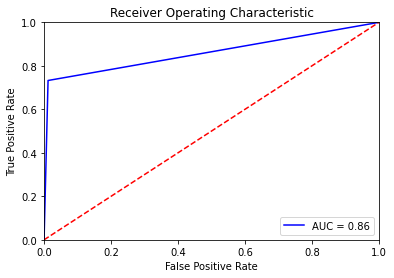

Confusion Matrix: 
 [[2408   29]
 [  27   74]]

Recall 'TP/TP+FN' =  0.7326732673267327


In [17]:
print(roc_auc_score(y_test, pred_ABC))

fpr, tpr, _ = roc_curve(y_test, pred_ABC)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


print("Confusion Matrix: \n",confusion_matrix(y_test,pred_ABC))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,pred_ABC))

# Using XGBost

[20:38:44] WARNING: /workspace/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9883235758947253
AUC: 0.9883


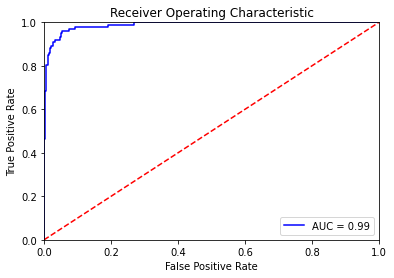

Confusion Matrix: 
 [[2413   24]
 [  20   81]]

Recall 'TP/TP+FN' =  0.801980198019802


In [19]:

dtrain = xgb.DMatrix(X_train[attributes], label=y_train)
dtest = xgb.DMatrix(X_test[attributes], label=y_test)


param = {
        'objective': 'binary:logistic',
        'booster': 'gbtree',
        'eval_metric': 'auc',
        'max_depth': 6,  # the maximum depth of each tree
        'eta': 0.003,  # the training step for each iteration
        'silent': 1}  # logging mode - quiet}  # the number of classes that exist in this datset
num_round = 5000  # the number of training iterations    
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

print (roc_auc_score(y_test, preds))
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

ypred_bst = np.array(bst.predict(dtest,ntree_limit=bst.best_iteration))
ypred_bst  = ypred_bst > 0.5
ypred_bst = ypred_bst.astype(int)  

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Confusion Matrix: \n",confusion_matrix(y_test,ypred_bst))
print("\nRecall 'TP/TP+FN' = ", recall_score(y_test,ypred_bst))

# Final decision on which model to use? after critical review I realized that XGBoost  has a higher AUC than Decision Tree Classifier and Random Forest Classifier

Select specific features such as data,place,long,lat and give earthquake probablity from prediction at that place and date as quake probability

Taking a range of 5 days

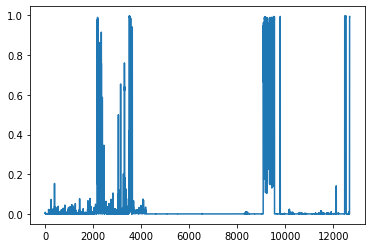

In [21]:
dlive = xgb.DMatrix(data[attributes]) #, label=[])
preds = bst.predict(dlive)

plt.plot(preds)
plt.show()

In [34]:
real_time = data[['date', 'place', 'latitude', 'longitude']]
real_time = real_time.assign(preds=pd.Series(preds).values)# aggregate down dups
real_time = real_time.groupby(['date', 'place'], as_index=False).mean()

# increment date to include DAYS_OUT_TO_PREDICT
real_time['date']= pd.to_datetime(real_time['date'],format='%Y-%m-%d') 
real_time['date'] = real_time['date'] + pd.to_timedelta(5,unit='d')
real_time

,date,place,latitude,longitude,preds
0,2020-07-10,Alaska,58.815605,-155.210617,0.002724
1,2020-07-10,CA,36.342380,-119.067160,0.000064
2,2020-07-10,Nevada,38.162231,-117.923334,0.000093
3,2020-07-10,Puerto Rico,17.983033,-66.915512,0.751901
4,2020-07-11,Alaska,58.815605,-155.210617,0.004601
...,...,...,...,...,...
357,2020-08-08,Nevada,38.162231,-117.923334,0.000161
358,2020-08-08,Oklahoma,36.223580,-97.636415,0.000097
359,2020-08-09,Alaska,58.815605,-155.210617,0.045717
360,2020-08-09,CA,36.342380,-119.067160,0.000101


In [35]:
preds

array([0.00319373, 0.00865015, 0.00307712, ..., 0.9947424 , 0.9953269 ,
       0.9944596 ], dtype=float32)

In [36]:
import datetime as dt


In [37]:
days = list(set([d for d in real_time['date'].astype(str) if d > dt.datetime.today().strftime('%Y-%m-%d')]))


In [38]:
days.sort()


In [39]:
predict_day=real_time['date'],[2]


In [40]:
predict_day

(0     2020-07-10
 1     2020-07-10
 2     2020-07-10
 3     2020-07-10
 4     2020-07-11
          ...    
 357   2020-08-08
 358   2020-08-08
 359   2020-08-09
 360   2020-08-09
 361   2020-08-09
 Name: date, Length: 362, dtype: datetime64[ns],
 [2])